In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("marketing_data.csv")

In [36]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [38]:
df.columns=df.columns.str.strip()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [40]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [41]:
df['Income'].unique()

array(['$84,835.00 ', '$57,091.00 ', '$67,267.00 ', ..., '$46,310.00 ',
       '$65,819.00 ', '$94,871.00 '], dtype=object)

In [42]:
df['Income']=df['Income'].str.replace('$','').str.replace(',','').astype('float')

/tmp/ipykernel_95/1581642955.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income']=df['Income'].str.replace('$','').str.replace(',','').astype('float')


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [44]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

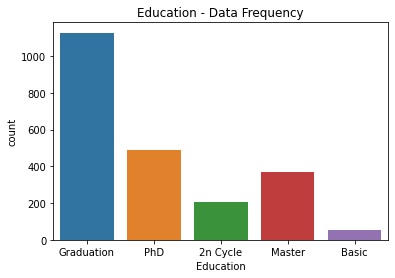

In [45]:
sns.countplot(x='Education',data=df)
plt.title("Education - Data Frequency")
plt.show()

In [46]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [47]:
df['Education']=df['Education'].apply(lambda x : 'Master'   if x=='2n Cycle' else x)

df['Education']=df['Education'].replace('Graduation','Undergraduate')

In [48]:
df['Education'].value_counts()

Undergraduate    1127
Master            573
PhD               486
Basic              54
Name: Education, dtype: int64

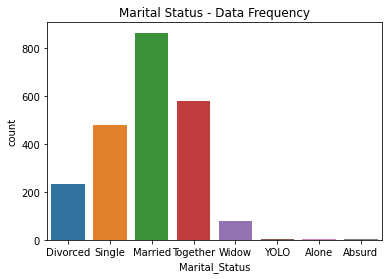

In [49]:
sns.countplot(x='Marital_Status',data=df)
plt.title("Marital Status - Data Frequency")
plt.show()

In [50]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [51]:
df['Marital_Status']=df['Marital_Status'].apply(lambda x : 'Single' if x in ['Alone','YOLO','Absurd'] else x)

In [52]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [53]:
numeric_col=df.select_dtypes(include=['number']).columns

In [54]:
numeric_col

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain'],
      dtype='object')

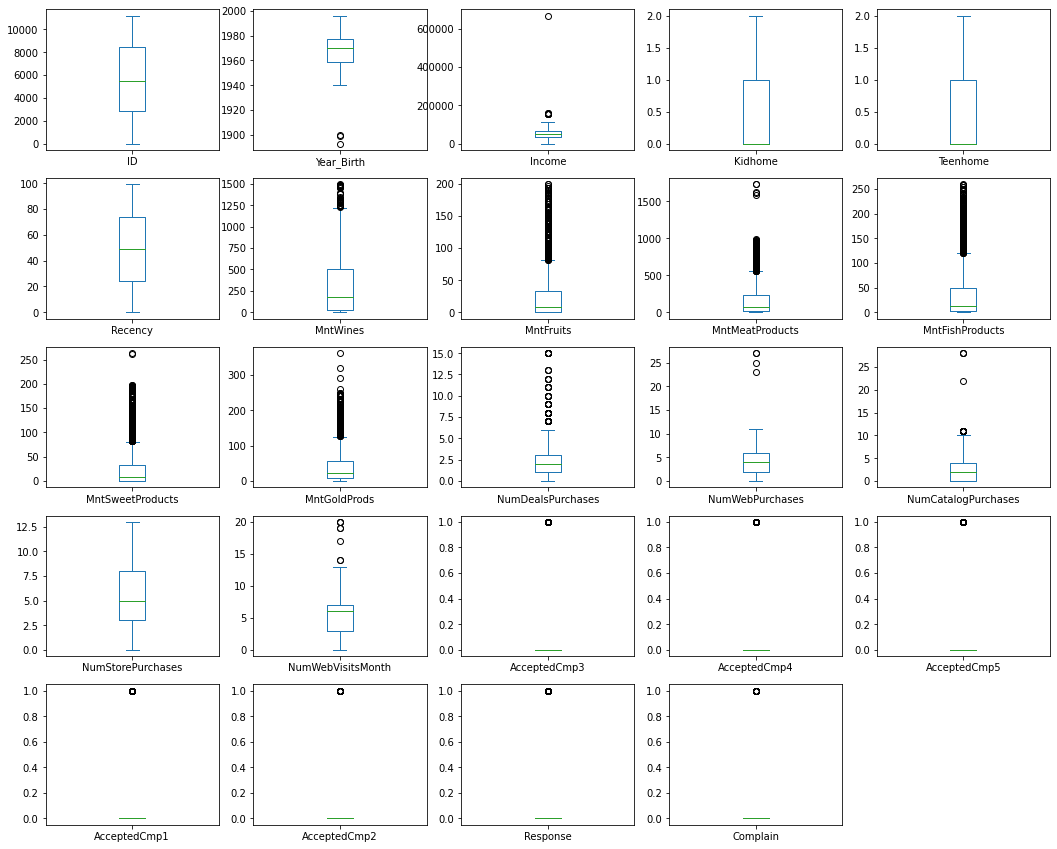

In [55]:
df[numeric_col].plot(kind='box',subplots=True,figsize=(18,15),layout=(5,5))
plt.show()

<AxesSubplot: xlabel='Income', ylabel='Density'>

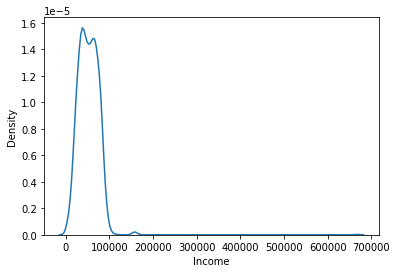

In [56]:
sns.kdeplot(data=df,x='Income')

<AxesSubplot: >

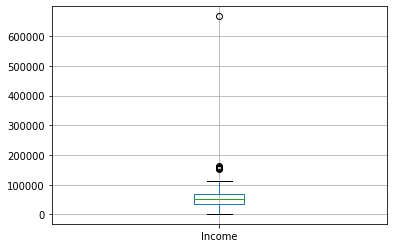

In [57]:
df.boxplot('Income')

<AxesSubplot: >

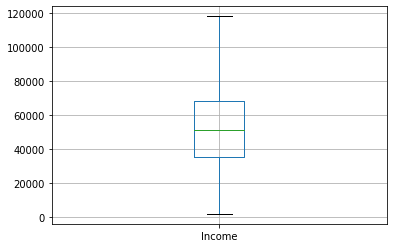

In [58]:
#using IQR on Income :

Q1=df['Income'].quantile(0.25)
Q3=df['Income'].quantile(0.75)

IQR=Q3-Q1

LB=Q1-(1.5*IQR)
UB=Q3+(1.5*IQR)

df['Income'].mask(df['Income'] > UB , UB,inplace=True)

df.boxplot('Income')

<AxesSubplot: >

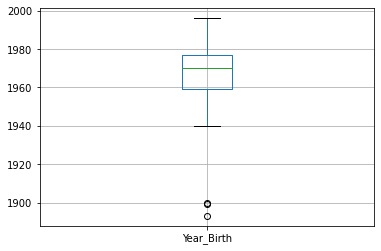

In [59]:
df.boxplot('Year_Birth')

<AxesSubplot: >

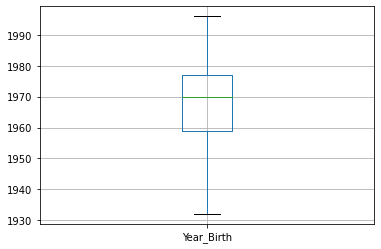

In [63]:
# removing outliers from year of birth
Q1=df['Year_Birth'].quantile(0.25)
Q3=df['Year_Birth'].quantile(0.75)
IQR=Q3-Q1

LB=Q1- (1.5*IQR)
UB=Q3+(1.5*IQR)

df['Year_Birth'].mask(df['Year_Birth'] < LB , LB , inplace=True)

df.boxplot('Year_Birth')

<AxesSubplot: xlabel='Year_Birth', ylabel='Density'>

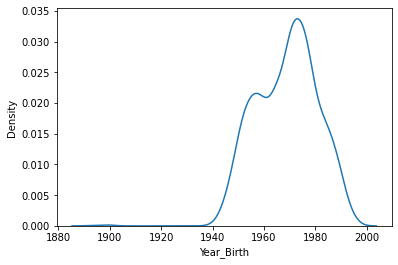

In [61]:
sns.kdeplot(data=df,x='Year_Birth')

In [64]:
df['Income'].isnull().sum()

24

In [67]:
df[['Education','Marital_Status']].value_counts().unstack()

Marital_Status,Divorced,Married,Single,Together,Widow
Education,,,,,
Basic,1,20,18,14,1
Master,60,219,114,163,17
PhD,52,192,101,117,24
Undergraduate,119,433,254,286,35


In [77]:
unique_Education=df['Education'].unique()
unique_MStatus=df['Marital_Status'].unique()


temp_data=df.copy()


all_data_mean=np.round(np.mean(temp_data['Income']),2)

for i in unique_Education:
    for j in unique_MStatus:
        filter=(temp_data['Education']==i) & (temp_data['Marital_Status']==j)
        filterd_data=temp_data[filter]
        mean=np.round(np.mean(filterd_data['Income']),2)
        if ~np.isnan(mean):
            filterd_data['Income']=filterd_data['Income'].fillna(mean)
        else:
            filterd_data['Income']=filterd_data['Income'].fillna(all_data_mean)
        
        temp_data[filter]=filterd_data
df=temp_data.copy()

/tmp/ipykernel_95/957068011.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterd_data['Income']=filterd_data['Income'].fillna(mean)


In [78]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [79]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Undergraduate,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Undergraduate,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,Master,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Undergraduate,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Undergraduate,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [80]:
# Age from birth year
from datetime import datetime
df['Age']= datetime.now().year - df['Year_Birth']


In [82]:
#Total number of children

df['Children_Count']=df['Kidhome']+df['Teenhome']

In [83]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age',
       'Children_Count'],
      dtype='object')

In [84]:
#Total Spending :

df['TotalSpending']=df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [85]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children_Count,TotalSpending
0,1826,1970,Undergraduate,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,54,0,1190
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,63,0,577
2,10476,1958,Undergraduate,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,66,1,251
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,57,2,11
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,35,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,48,1,689
2236,5263,1977,Master,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,47,1,55
2237,22,1976,Undergraduate,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,48,1,309
2238,528,1978,Undergraduate,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,46,0,1383


In [86]:
df['Education'].unique()

array(['Undergraduate', 'PhD', 'Master', 'Basic'], dtype=object)

In [87]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df['Education'])
df['Education1']=encoder.transform(df['Education'])



In [88]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children_Count,TotalSpending,Education1
0,1826,1970,Undergraduate,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,54,0,1190,3
1,1,1961,Undergraduate,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,63,0,577,3
2,10476,1958,Undergraduate,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,66,1,251,3
3,1386,1967,Undergraduate,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,57,2,11,3
4,5371,1989,Undergraduate,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,35,1,91,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,US,48,1,689,2
2236,5263,1977,Master,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,SP,47,1,55,1
2237,22,1976,Undergraduate,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,SP,48,1,309,3
2238,528,1978,Undergraduate,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,IND,46,0,1383,3


In [89]:
df=pd.get_dummies(df,columns=['Marital_Status'])

In [90]:
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Country,Age,Children_Count,TotalSpending,Education1,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1826,1970,Undergraduate,84835.0,0,0,2014-06-16,0,189,104,...,SP,54,0,1190,3,1,0,0,0,0
1,1,1961,Undergraduate,57091.0,0,0,2014-06-15,0,464,5,...,CA,63,0,577,3,0,0,1,0,0
2,10476,1958,Undergraduate,67267.0,0,1,2014-05-13,0,134,11,...,US,66,1,251,3,0,1,0,0,0
3,1386,1967,Undergraduate,32474.0,1,1,2014-05-11,0,10,0,...,AUS,57,2,11,3,0,0,0,1,0
4,5371,1989,Undergraduate,21474.0,1,0,2014-04-08,0,6,16,...,SP,35,1,91,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,66476.0,0,1,2013-03-07,99,372,18,...,US,48,1,689,2,1,0,0,0,0
2236,5263,1977,Master,31056.0,1,0,2013-01-22,99,5,10,...,SP,47,1,55,1,0,1,0,0,0
2237,22,1976,Undergraduate,46310.0,1,0,2012-12-03,99,185,2,...,SP,48,1,309,3,1,0,0,0,0
2238,528,1978,Undergraduate,65819.0,0,0,2012-11-29,99,267,38,...,IND,46,0,1383,3,0,1,0,0,0


/tmp/ipykernel_95/3157644769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


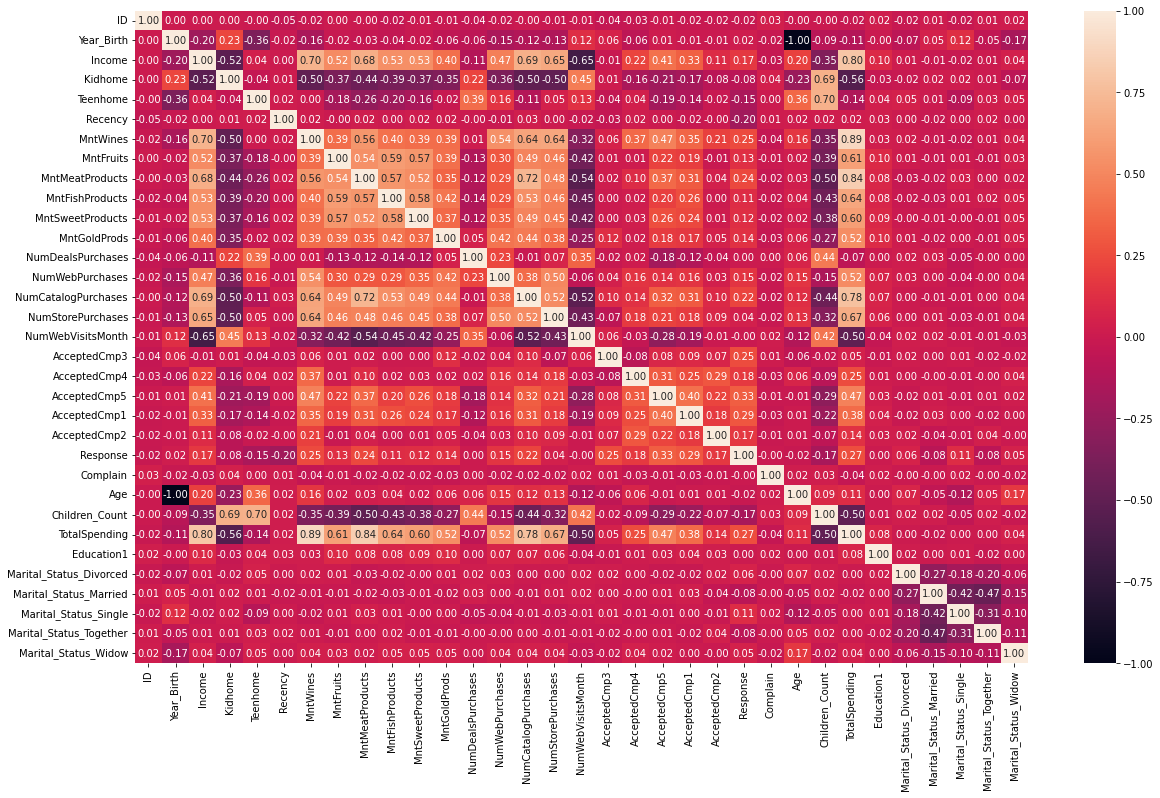

In [93]:
corr=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

In [98]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Children_Count',
       'TotalSpending', 'Education1', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

In [96]:
#Older people are not as tech-savvy and probably prefer shopping in-store.

In [100]:
df_age=df[['Age','NumWebPurchases','NumStorePurchases']]

df_age.loc[(df_age['Age'] <=25), 'Age_Group']='Young'
df_age.loc[(df_age['Age'] >50), 'Age_Group']='Elderly'
df_age.loc[(df_age['Age'] >25) & (df_age['Age']<=50), 'Age_Group']='Middle Age'


/tmp/ipykernel_95/967372989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age.loc[(df_age['Age'] <=25), 'Age_Group']='Young'


In [101]:
df_age

,Age,NumWebPurchases,NumStorePurchases,Age_Group
0,54,4,6,Elderly
1,63,7,7,Elderly
2,66,3,5,Elderly
3,57,1,2,Elderly
4,35,3,2,Middle Age
...,...,...,...,...
2235,48,5,11,Middle Age
2236,47,1,3,Middle Age
2237,48,6,5,Middle Age
2238,46,5,10,Middle Age


In [102]:
df_age[['Age_Group','NumWebPurchases','NumStorePurchases']].groupby('Age_Group').sum()

,NumWebPurchases,NumStorePurchases
Age_Group,,
Elderly,6055,8411
Middle Age,3095,4559


<AxesSubplot: xlabel='Age_Group'>

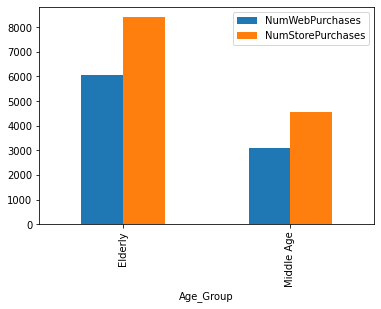

In [105]:
df_age[['Age_Group','NumWebPurchases','NumStorePurchases']].groupby('Age_Group').sum().plot(kind='bar')

In [ ]:
#Customers with kids probably have less time to visit a store and would prefer to shop online

In [107]:
df_kids=df[['Children_Count','NumWebPurchases','NumStorePurchases']]

In [108]:
df_kids.groupby('Children_Count').sum()

,NumWebPurchases,NumStorePurchases
Children_Count,,
0,2803,4635
1,4834,6310
2,1361,1815
3,152,210


<AxesSubplot: xlabel='Children_Count'>

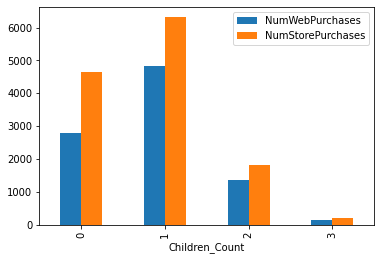

In [109]:
df_kids.groupby('Children_Count').sum().plot(kind='bar')

In [110]:
#Other distribution channels may cannibalize sales at the store.

In [111]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Children_Count',
       'TotalSpending', 'Education1', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

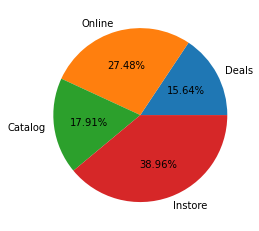

In [114]:
labels=['Deals','Online','Catalog','Instore']
size=[df['NumDealsPurchases'].sum(),df['NumWebPurchases'].sum(),
     df['NumCatalogPurchases'].sum(),df['NumStorePurchases'].sum()]


plt.pie(size,labels=labels,autopct='%.2f%%')
plt.show()

In [115]:
#Does the US fare significantly better than the rest of the world in terms of total purchases?

In [116]:
df.groupby('Country')['TotalSpending'].sum()

Country
AUS     89763
CA     168532
GER     74913
IND     79485
ME       3122
SA     211071
SP     662220
US      67882
Name: TotalSpending, dtype: int64

<AxesSubplot: xlabel='Country'>

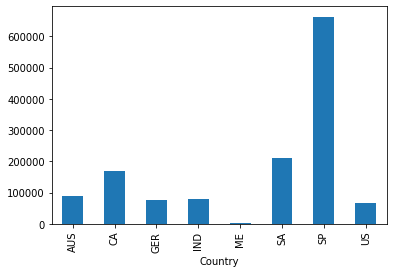

In [117]:
df.groupby('Country')['TotalSpending'].sum().plot(kind='bar')

In [ ]:
#Which products are performing the best, and which are performing the least in terms of revenue

In [118]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age', 'Children_Count',
       'TotalSpending', 'Education1', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

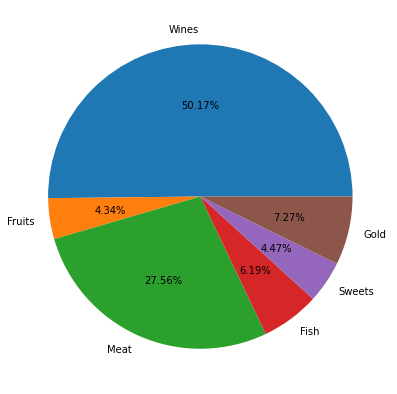

In [121]:
data=[df['MntWines'].sum(),
     df['MntFruits'].sum(),
     df['MntMeatProducts'].sum(),
     df['MntFishProducts'].sum(),
     df['MntSweetProducts'].sum(),
     df['MntGoldProds'].sum()]
labels=['Wines','Fruits','Meat','Fish','Sweets','Gold']
plt.figure(figsize=(10,7))
plt.pie(data,labels=labels,autopct="%.2f%%")
plt.show()

In [ ]:
#Is there any pattern between the age of customers and the last campaign acceptance rate?

<AxesSubplot: xlabel='Response', ylabel='Age'>

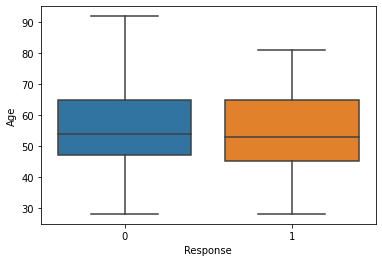

In [122]:
sns.boxplot(data=df,x=df['Response'],y=df['Age'])

In [123]:
#Which Country has the greatest number of customers who accepted the last campaign?

In [129]:
data=df.loc[df['Response']==1,['Country','Response']]

data1=data.groupby('Country').sum().reset_index()

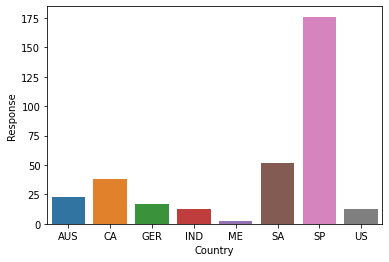

In [130]:
sns.barplot(data=data1,x='Country',y='Response')
plt.show()

In [131]:
#Do you see any pattern in the no. of children at home and total spend?

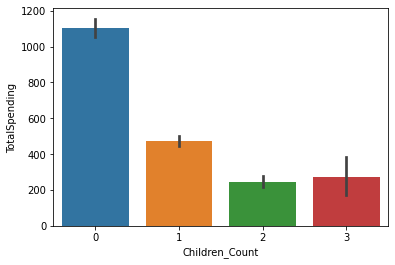

In [134]:
sns.barplot(x=df['Children_Count'],y=df['TotalSpending'],data=df)
plt.show()

In [135]:
df['Total_purchase']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumDealsPurchases']+df['NumStorePurchases']

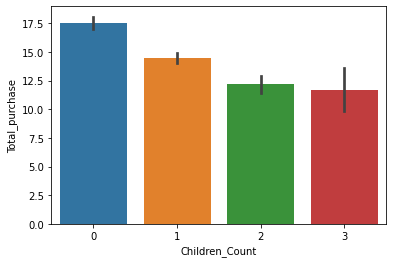

In [136]:
sns.barplot(x=df['Children_Count'],y=df['Total_purchase'])
plt.show()

In [137]:
#Education background of the customers who complained in the last 2 years.

In [138]:
df[['Education','Complain']].groupby('Education').sum().reset_index()

,Education,Complain
0,Basic,0
1,Master,6
2,PhD,1
3,Undergraduate,14


In [141]:
data=df[['Education','Complain']].groupby('Education').sum().reset_index()

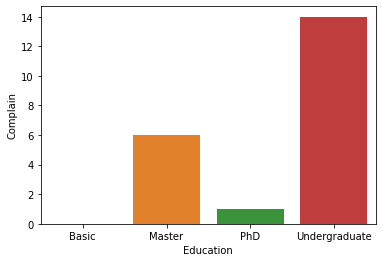

In [142]:
sns.barplot(data=data,x='Education',y='Complain')
plt.show()